<a href="https://colab.research.google.com/github/vishwvir-singh/DeepLearningForNLP/blob/main/keras_dense_sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets.imdb import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import pandas as pd

2.4.0


In [ ]:
import os
sentiment_classifier_dir = '/content/sentiment_classifier/dense'
if not os.path.exists(sentiment_classifier_dir):
    os.makedirs(sentiment_classifier_dir)
    print('Directory created successfully !!')
os.chdir(sentiment_classifier_dir)
print('Path ---> ', os.getcwd(), 'ListDirs ---> ' , os.listdir())

Directory created successfully !!
Path --->  /content/sentiment_classifier/dense ListDirs --->  []


In [ ]:
#vector space encoding
n_unique_word = 5000 #pick only 5000 words from dataset
skip_n_most_occur_word = 50
max_word_limit = 100
pad_type = trun_type = 'pre'

#Training
emd_dim = 64
n_dense = 64
dropout_value = 0.5
epoch = 4
batch_size = 128

In [ ]:
imdb_dataset_actual = load_data()
imdb_dataset = load_data(num_words=n_unique_word, skip_top=skip_n_most_occur_word)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
(x_train, y_train), (x_valid, y_valid) = imdb_dataset

In [ ]:
print(x_train[0:6]) # 0 reserved for padding; 1 would be starting character; 2 is unknown; 3 is most common word, etc.

[list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2])
 list([2, 194, 1153, 194, 2, 78, 228, 2, 2, 1463, 4369, 2, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 207, 110, 3103,

In [ ]:
print(imdb_dataset_actual[0][0][0:6])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

In [ ]:
word_index = tf.keras.datasets.imdb.get_word_index()
word_index = {k:v+3 for k,v in word_index.items()} #Manually handle 0, 1, 2 Indexes. Pad = 0, except n_unique_words word will change to 2, and 1 is used to show new sentence
word_index['PAD'] = 0
word_index['START'] = 1
word_index['UKN'] = 2  ##Most occur word -- generally are use less i.e. the, is, a , etc
#to convert number to word we need index to word mapping
index_word = {v:k for k,v in word_index.items()}

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
 for sent in x_train[0:6]:
    print([index_word[num] for num in sent])

['UKN', 'UKN', 'UKN', 'UKN', 'UKN', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'UKN', 'part', 'UKN', 'played', 'UKN', 'UKN', 'could', 'UKN', 'imagine', 'being', 'there', 'robert', 'UKN', 'UKN', 'UKN', 'amazing', 'actor', 'UKN', 'now', 'UKN', 'same', 'being', 'director', 'UKN', 'father', 'came', 'UKN', 'UKN', 'same', 'scottish', 'island', 'UKN', 'myself', 'UKN', 'UKN', 'loved', 'UKN', 'fact', 'there', 'UKN', 'UKN', 'real', 'connection', 'UKN', 'UKN', 'UKN', 'UKN', 'witty', 'remarks', 'throughout', 'UKN', 'UKN', 'were', 'great', 'UKN', 'UKN', 'UKN', 'brilliant', 'UKN', 'much', 'UKN', 'UKN', 'bought', 'UKN', 'UKN', 'UKN', 'soon', 'UKN', 'UKN', 'UKN', 'released', 'UKN', 'UKN', 'UKN', 'would', 'recommend', 'UKN', 'UKN', 'everyone', 'UKN', 'watch', 'UKN', 'UKN', 'fly', 'UKN', 'UKN', 'amazing', 'really', 'cried', 'UKN', 'UKN', 'end', 'UKN', 'UKN', 'UKN', 'sad', 'UKN', 'UKN', 'know', 'what', 'UKN', 'say', 'UKN', 'UKN', 'cry', 'UKN', '

In [ ]:
for sent in imdb_dataset_actual[0][0][0:6]:
    print([index_word[num] for num in sent])

['START', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', "redford's", 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', "norman's", 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', 'retail', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', 'cr

In [ ]:
#Preprocess Data

x_train = pad_sequences(x_train, padding=pad_type, truncating=trun_type, maxlen=max_word_limit)
x_valid = pad_sequences(x_valid, padding=pad_type, truncating=trun_type, maxlen=max_word_limit)
print(imdb_dataset[0][0][0][-100:] == x_train[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [ ]:
#Design Neural Network Achitecture

model = Sequential()
model.add(Embedding(input_dim=n_unique_word, output_dim=emd_dim, input_length=max_word_limit))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout_value))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                409664    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# embedding layer dimensions and parameters: 
print(emd_dim, n_unique_word, emd_dim*n_unique_word)

# ...flatten:
print(max_word_limit, emd_dim, emd_dim*max_word_limit)

# ...dense:
print(n_dense, emd_dim*max_word_limit*n_dense + n_dense) # weights + biases

# ...and output:
print(n_dense + 1)

64 5000 320000
100 64 6400
64 409664
65


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Nadam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
modelcheckpoint = ModelCheckpoint(filepath= sentiment_classifier_dir + "/weights.{epoch:02d}.hdf5")

In [ ]:
model.fit(x= x_train, y = y_train, 
          batch_size= batch_size, epochs=epoch, verbose=1, 
          validation_data=(x_valid, y_valid), 
          callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 5s 12ms/step - loss: 0.6386 - accuracy: 0.5947 - val_loss: 0.4114 - val_accuracy: 0.8134
Epoch 2/4
196/196 [==============================] - 2s 10ms/step - loss: 0.2813 - accuracy: 0.8889 - val_loss: 0.3462 - val_accuracy: 0.8459
Epoch 3/4
196/196 [==============================] - 2s 11ms/step - loss: 0.1358 - accuracy: 0.9588 - val_loss: 0.4323 - val_accuracy: 0.8271
Epoch 4/4
196/196 [==============================] - 2s 12ms/step - loss: 0.0330 - accuracy: 0.9949 - val_loss: 0.5135 - val_accuracy: 0.8322


In [ ]:
#Since you have used checkpoints then you should load the weights where you have received less val_loss and high val_accuracy. If val_loss and accuracy are increasing it means we are over fitting model.

#so in here we can see that weights of epoch 2 are perfect for us.

model.get_weights()  ###Default --- weights of final epoch

[array([[ 6.7037991e-03, -5.4490920e-03,  1.6293849e-03, ...,
          7.0733330e-03,  1.9966708e-02, -2.8487886e-03],
        [-4.3956995e-02,  2.9110122e-02,  1.2736607e-02, ...,
          1.9217167e-02,  1.6716782e-02, -4.1803110e-02],
        [-4.4049951e-03, -1.5036619e-02, -5.6201955e-03, ...,
         -1.0984777e-02,  5.3678602e-03, -4.8127361e-03],
        ...,
        [-1.5316396e-02,  1.1326267e-02,  2.8732347e-03, ...,
         -5.7777683e-03,  3.3938818e-02,  4.3246383e-03],
        [ 3.1773157e-02,  3.8616448e-03,  1.5406535e-02, ...,
         -3.9985433e-02,  1.9695571e-02,  3.4007099e-02],
        [ 4.3256294e-02, -1.7866107e-02,  2.4488145e-06, ...,
          1.0169439e-02, -8.9777082e-02,  8.0895016e-04]], dtype=float32),
 array([[-0.12053134,  0.10923452, -0.01461972, ...,  0.02951156,
          0.028218  ,  0.0078553 ],
        [-0.03719204, -0.0307371 , -0.00871126, ...,  0.02559639,
         -0.05188409, -0.01765474],
        [ 0.00620102, -0.03051213,  0.01811679

In [ ]:
model.load_weights(filepath=sentiment_classifier_dir+ '/weights.02.hdf5') ## Replacing final epoch weights with 2nd epoch weights
print(model.get_weights())

[array([[ 0.00540386, -0.00781106,  0.00042872, ...,  0.00456671,
         0.02517893, -0.00050532],
       [-0.043957  ,  0.02911012,  0.01273661, ...,  0.01921717,
         0.01671678, -0.04180311],
       [-0.00462276, -0.01615491, -0.00713724, ...,  0.00242273,
         0.00793285, -0.00437395],
       ...,
       [-0.01094206,  0.02089135,  0.00186055, ..., -0.0123014 ,
         0.04871495,  0.00863227],
       [ 0.04082644,  0.00771658,  0.02502159, ..., -0.02168016,
         0.0269922 ,  0.03115391],
       [ 0.03162267, -0.02843077, -0.00915241, ...,  0.01831209,
        -0.0765381 ,  0.00354468]], dtype=float32), array([[ 0.02083917,  0.08199565, -0.01953138, ..., -0.01191101,
        -0.02176337, -0.01909356],
       [ 0.00028095, -0.02699921, -0.00133837, ...,  0.00344459,
        -0.05560175, -0.02167443],
       [ 0.01567588,  0.00983642,  0.0158761 , ...,  0.0520187 ,
         0.00520191,  0.04982122],
       ...,
       [ 0.01272246,  0.03916451,  0.01484107, ...,  0.095

In [ ]:
import numpy as np

weights = model.get_weights()

"""
Layer (type)                 Output Shape              Param #   
=================================================================
embedding (Embedding)        (None, 100, 64)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                409664    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
=================================================================
"""

###Total Layers
print(len(weights))
##weights in layer 1
print(len(weights[0]), np.shape(weights[0]), len(weights[0][0]))
##weights in layer 2
print(len(weights[1]), np.shape(weights[1]))
##weights in layer 3
print(len(weights[2]), np.shape(weights[2]))
##weights in layer 4
print(len(weights[3]), np.shape(weights[3]))
##weights in layer 5
print(len(weights[4]), np.shape(weights[4]))

5
5000 (5000, 64) 64
6400 (6400, 64)
64 (64,)
64 (64, 1)
1 (1,)


In [ ]:
#y_hat = model.predict_proba(x_valid) #`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
#print(len(y_hat), y_hat[:10])
y_hat = model.predict(x_valid)
print(len(y_hat), y_hat)

25000 [[0.1490888 ]
 [0.98190904]
 [0.79257405]
 ...
 [0.03466239]
 [0.06939093]
 [0.66840297]]


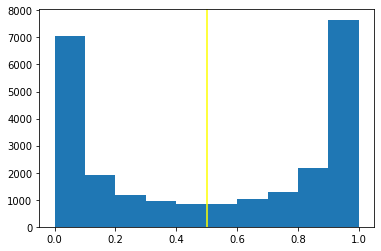

In [ ]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color = 'yellow')

In [ ]:
percentage_auc = roc_auc_score(y_true=y_valid, y_score=y_hat) * 100.0
print('percentage_auc == {} % '.format(percentage_auc))

percentage_auc == 92.81002784 % 


In [ ]:
y_df = pd.DataFrame(list(zip(y_valid, [yhat[0] for yhat in y_hat])), columns=['y_true', 'y_predict'])
y_df.head(10)

,y_true,y_predict
0,0,0.149089
1,1,0.981909
2,1,0.792574
3,0,0.678185
4,1,0.995276
5,1,0.834641
6,1,0.942094
7,0,0.014542
8,0,0.905001
9,1,0.900844


In [ ]:
y_df[(y_df.y_true == 1) & (y_df.y_predict <= 0.1)]

,y_true,y_predict
80,1,0.082932
101,1,0.027308
224,1,0.087071
300,1,0.057016
325,1,0.060753
...,...,...
24734,1,0.059009
24764,1,0.073388
24780,1,0.083788
24789,1,0.060625


In [ ]:
' '.join(index_word[id] for id in imdb_dataset_actual[1][0][300])    #[True ==1 , Predict ==0]

"START nurse charlotte beale the lovely rosie has arrived to dr clinic for the insane prepared for a new job what she doesn't expect is to find another supposed doctor in his position after stephens is attacked by axe wielding maniacal judge oliver w cameron in a running gag anytime he confronts a situation out of his control he retreats to repeating his name that doctor is geraldine masters annabelle who isn't sure about whether beale is a proper fit for their establishment after a long discussion about the position which is quite an awkward scene as the two debate about being sent a letter by stephens getting a job at the clinic with masters often reminding her that he is no longer in charge masters agrees to let her work in the nursing position but the good doctor may not be who she seems br br the assortment of loonies includes sam bill mcgee a simple minded child man who was last victim of lobotomy jennifer warren a woman who needs an adult to comfort her as she wallows at masters

In [ ]:
y_df[(y_df.y_true == 0) & (y_df.y_predict > 0.9)]

,y_true,y_predict
8,0,0.905001
75,0,0.933874
152,0,0.944300
386,0,0.950011
455,0,0.909988
...,...,...
24231,0,0.948126
24593,0,0.931674
24692,0,0.959834
24696,0,0.928004


In [ ]:
' '.join(index_word[id] for id in imdb_dataset_actual[1][0][24696])   #[True ==0 , Predict ==1]

"START in 1932 humphrey bogart was a relative unknown an unproven actor who was starring in one of his first films and because he was an unknown the movie they gave him was clearly a b movie a quick film with relatively low expectations after seeing it i could see why it would still take bogart many more years and another film studio before he became a household name while the film isn't terrible it certainly isn't good making it more of a curiosity than anything else when seen today br br bogart is a pilot who has dreams of building his own aircraft engine company however when a vacuous rich playgirl comes his way his dreams all seem to go on hold as one of the characters in the film said the combination of the two is like oil and water they just don't mix br br while bogart is throwing away his promising career his sister is going full speed on the road to having met a sleazy guy who convinces her to sleep with rich guys so they can shake them down for tons of cash bogey has no idea 